<a href="https://colab.research.google.com/github/amgito1648/clase-inteligencia-artificial/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Adaptado de: Octavio Gutiérrez de Código Máquina




# Análisis de Componentes Principales (PCA)
# Contexto y Datos

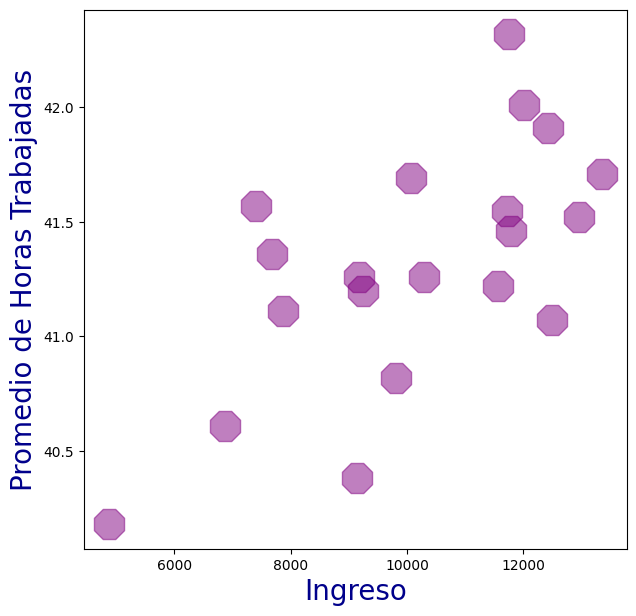

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

datos = {"ingreso" : [9136.81, 11709.94, 12416.79, 4875.73, 10065.03,
                      11755.33, 7401.78, 10291.38, 12002.42, 11787.76,
                      13347.65, 7676.76, 9808.56, 11556.47, 7875.49,
                      12486.19, 9242.40, 6867.09, 12946.25, 9167.36],

         "horas_trabajadas" : [40.38, 41.55, 41.91, 40.18, 41.69,
                               42.32, 41.57, 41.26, 42.01, 41.46,
                               41.71, 41.36, 40.82, 41.22, 41.11,
                               41.07, 41.20, 40.61, 41.52, 41.26]}

datos = pd.DataFrame(datos)

# Código de visualización
fig = plt.figure(figsize=(7, 7))
plt.scatter(datos["ingreso"], datos["horas_trabajadas"],
            marker="8", s=550, color="purple", alpha=0.5)
plt.xlabel("Ingreso", fontsize=20, color="darkblue")
plt.ylabel("Promedio de Horas Trabajadas", fontsize=20, color="darkblue")
plt.show()

In [ ]:
datos

,ingreso,horas_trabajadas
0,9136.81,40.38
1,11709.94,41.55
2,12416.79,41.91
3,4875.73,40.18
4,10065.03,41.69
5,11755.33,42.32
6,7401.78,41.57
7,10291.38,41.26
8,12002.42,42.01
9,11787.76,41.46


<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>
## Reducción de dimensionalidad con PCA
# Paso 1: Estandarizar los datos

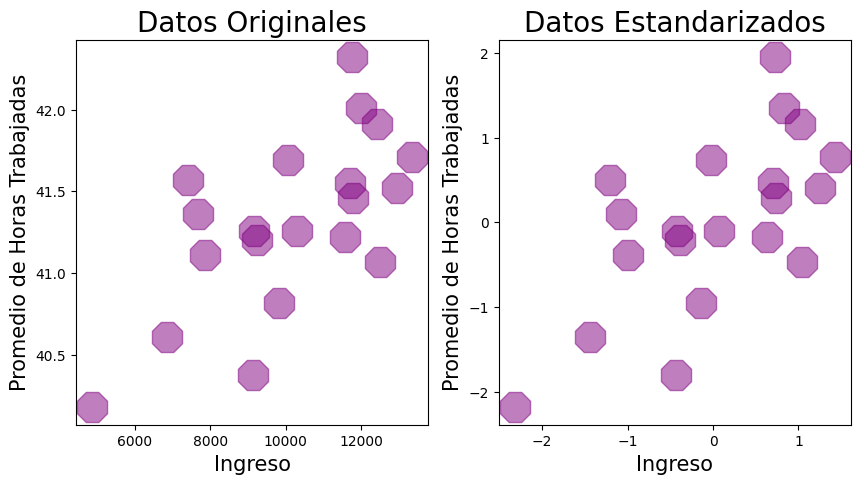

In [ ]:
from sklearn.preprocessing import StandardScaler

# Código de visualización

fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.set_title("Datos Originales", fontsize=20)
ax1.scatter(datos["ingreso"], datos["horas_trabajadas"],
            marker="8", s=550, color="purple", alpha=0.5)
ax1.set_xlabel("Ingreso", fontsize=15)
ax1.set_ylabel("Promedio de Horas Trabajadas", fontsize=15)


# Estandarización de los datos
datos = pd.DataFrame(StandardScaler().fit_transform(datos),
                     columns=["ingreso", "horas_trabajadas"])


# Código de visualización
ax2.set_title("Datos Estandarizados", fontsize=20)
ax2.scatter(datos["ingreso"], datos["horas_trabajadas"],
            marker="8", s=550, color="purple", alpha=0.5)
ax2.set_xlabel("Ingreso", fontsize=15)
ax2.set_ylabel("Promedio de Horas Trabajadas", fontsize=15)

plt.show()

In [ ]:
datos

,ingreso,horas_trabajadas
0,-0.435481,-1.796832
1,0.703231,0.462484
2,1.016040,1.157658
3,-2.321176,-2.183040
4,-0.024707,0.732829
5,0.723318,1.949384
6,-1.203300,0.501105
7,0.075462,-0.097517
8,0.832665,1.350762
9,0.737669,0.288690


In [ ]:
datos.var()

,0
ingreso,1.052632
horas_trabajadas,1.052632


<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>
## Reducción de dimensionalidad con PCA
# Paso 2: Matriz de covarianza

                   ingreso  horas_trabajadas
ingreso           1.052632          0.682360
horas_trabajadas  0.682360          1.052632


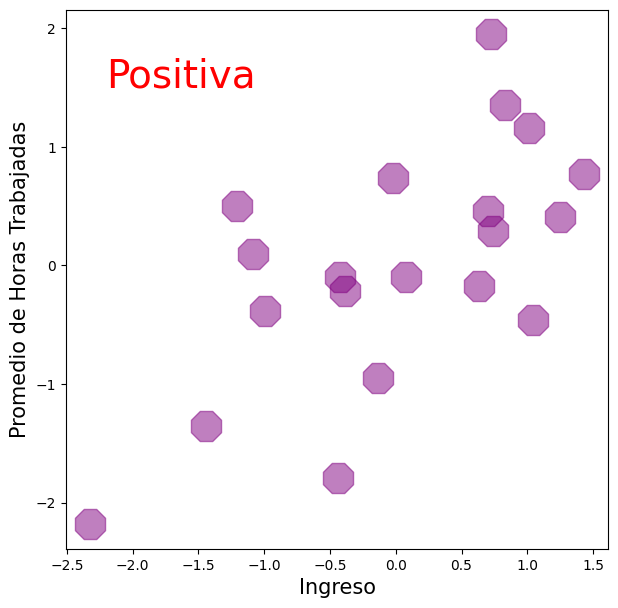

In [ ]:
print(datos.cov())

# Código de visualización

plt.figure(figsize=(7, 7))
plt.scatter(datos["ingreso"], datos["horas_trabajadas"],
            marker="8", s=550, color="purple", alpha=0.5)
plt.xlabel("Ingreso", fontsize=15)
plt.ylabel("Promedio de Horas Trabajadas", fontsize=15)
plt.text(-2.2, 1.5, "Positiva", fontsize=28, color="red")
plt.show()

<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>
## Reducción de dimensionalidad con PCA
# Paso 3: Eigenvalores & Eigenvectores

Eigenvector Rojo: [-0.70710678 -0.70710678] Eigenvalor: 1.734991434394586
Eigenvector Azul: [-0.70710678  0.70710678] Eigenvalor: 0.3702717235001506


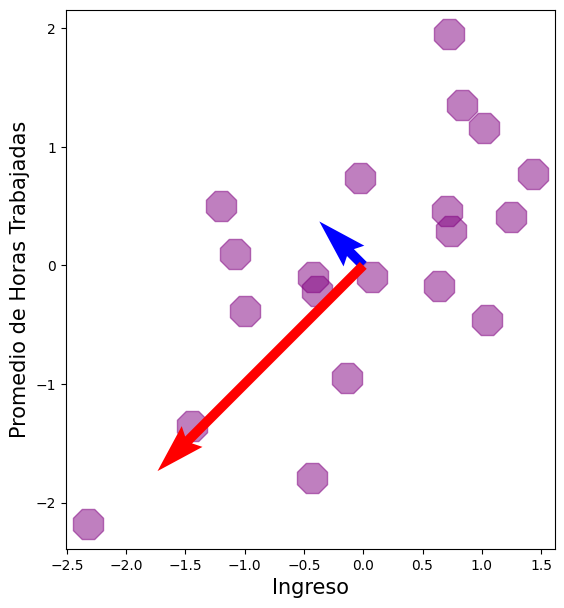

In [ ]:
from numpy.linalg import eig

# Calcular eigenvalores y eigenvectores
valores, vectores = eig(datos.cov())

vector_azul = vectores[:, 0]
vector_rojo = vectores[:, 1]

print("Eigenvector Rojo:", vector_rojo, "Eigenvalor:", valores[1])
print("Eigenvector Azul:", vector_azul, "Eigenvalor:", valores[0])

# Código de visualización

plt.figure(figsize=(7, 7))
plt.axes().set_aspect("equal")

# Graficando los datos
plt.scatter(datos["ingreso"], datos["horas_trabajadas"],
            marker="8", s=550, color="purple", alpha=0.5)

# Graficando los eigenvectores
plt.quiver(0, 0,
           vector_azul[0]/abs(vector_azul[0])*valores[0],
           vector_azul[1]/abs(vector_azul[1])*valores[0],
           color="blue", angles="xy", scale_units="xy", scale=1, width=0.02)

plt.quiver(0, 0,
           vector_rojo[0]/abs(vector_rojo[0])*valores[1],
           vector_rojo[1]/abs(vector_rojo[1])*valores[1],
           color="red", angles="xy", scale_units="xy", scale=1, width=0.02)

plt.xlabel("Ingreso", fontsize=15)
plt.ylabel("Promedio de Horas Trabajadas", fontsize=15)
plt.show()

<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>
## Reducción de dimensionalidad con PCA
# Paso 4: Proyecta datos

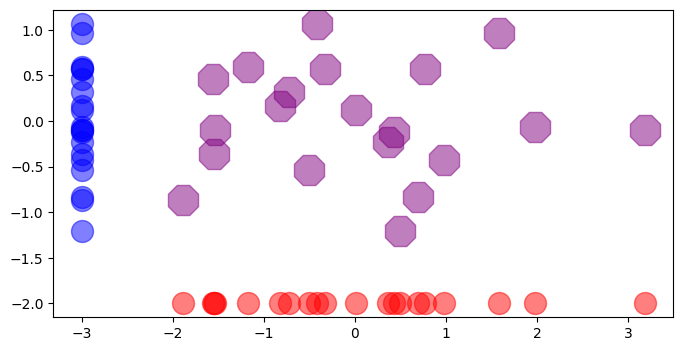

In [ ]:
proyectados = pd.DataFrame(datos.values @ vectores.T,
                          columns=["ingreso", "horas_trabajadas"])

# Código de visualización
plt.figure(figsize=(8, 8))
plt.axes().set_aspect("equal")

# Datos rotados
plt.scatter(proyectados["ingreso"], proyectados["horas_trabajadas"],
            marker="8", s=550, color="purple", alpha=0.5)

# Proyección de los datos en 1 dimensión
plt.scatter(proyectados["ingreso"], [-2]*len(proyectados["ingreso"]),
            s=250, color="red", alpha=0.5)

plt.scatter([-3]*len(proyectados["horas_trabajadas"]), proyectados["horas_trabajadas"],
            s=250, color="blue", alpha=0.5)
plt.show()

## Reducción de dimensionalidad con PCA
# Paso 5: Selecciona los componentes

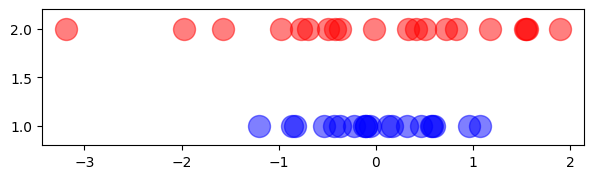

Varianza explicada por cada componente: [1.73499143 0.37027172]
Proporción de varianza explicada por cada componente: [0.82412093 0.17587907]


In [ ]:
from sklearn.decomposition import PCA

# Obtención de componentes principales
pca = PCA()
datos = pca.fit_transform(datos)

# Código de visualización
plt.figure(figsize=(7, 7))
plt.axes().set_aspect("equal")
plt.scatter(datos[:, 0], [2]*datos[:, 0].size, s=250, color="red", alpha=0.5)
plt.scatter(datos[:, 1], [1]*datos[:, 1].size, s=250, color="blue", alpha=0.5)
plt.ylim((0.8, 2.2))
plt.show()
print("Varianza explicada por cada componente:", pca.explained_variance_)
print("Proporción de varianza explicada por cada componente:", pca.explained_variance_ratio_)